In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

import seaborn as sns

from sklearn.datasets import load_breast_cancer



In [2]:
cancer = load_breast_cancer()

In [5]:
features = pd.DataFrame(cancer.data,columns = cancer.feature_names)

In [6]:
target = pd.DataFrame(cancer.target,columns=['TARGET'])

In [7]:
data = pd.concat([features,target],axis=1)

In [8]:
x = np.array(data['worst concave points'])
y = np.array(data['TARGET'])


In [9]:
x = x.reshape(-1,1)

In [10]:
scaler = MinMaxScaler()

In [11]:
x = scaler.fit_transform(x)

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [13]:
regressor = LogisticRegression()

In [14]:
regressor.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
ypred = regressor.predict(xtest)
ypred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1])

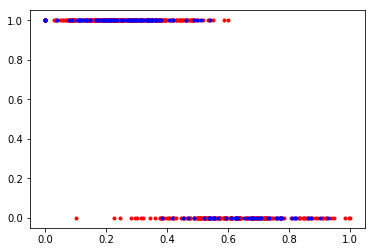

In [18]:
plt.plot(xtrain,ytrain,'r.',xtest,ytest,'b.')

In [23]:
cm  = confusion_matrix(ytest,ypred)
cm

array([[38,  4],
       [ 4, 68]], dtype=int64)

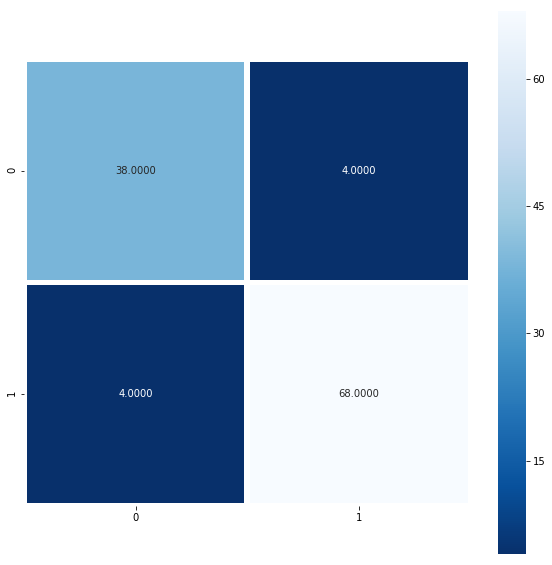

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='.4f',linewidth=5,square=True,cmap='Blues_r')

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.9298245614035088


In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90        42
          1       0.94      0.94      0.94        72

avg / total       0.93      0.93      0.93       114

